In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

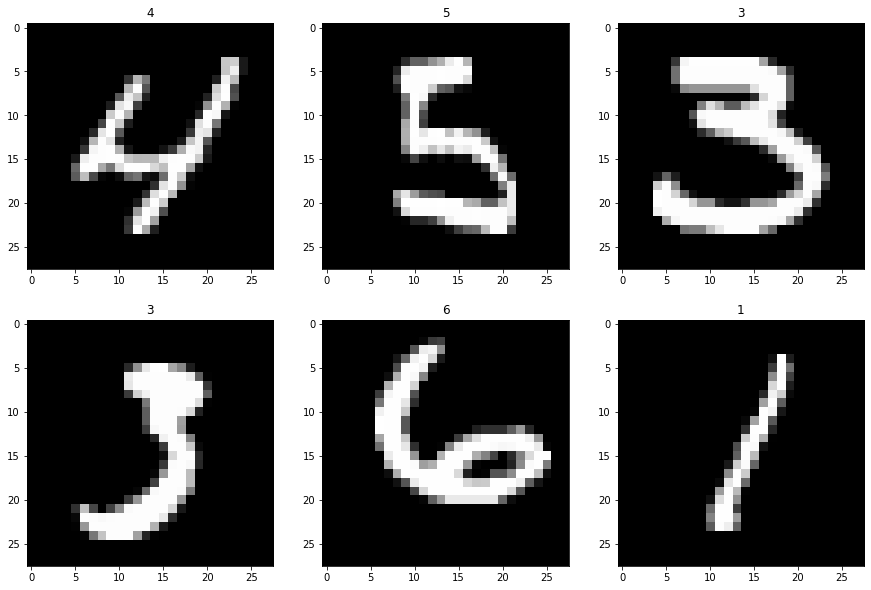

In [3]:
import matplotlib.pyplot as plt
n_images = 6
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
indexes = np.random.randint(0, X_train.shape[0], n_images)
count = 0
for i in range(2):
  for j in range(3):
    axes[i][j].imshow(X_train[indexes[count]], cmap='gray')
    axes[i][j].set_title(y_train[indexes[count]])
    count += 1

In [4]:
def build_model():
  inputs = layers.Input(shape=(28, 28, 1))
  x = layers.Flatten()(inputs)
  x = layers.Dense(128, activation='relu')(x)
  x = layers.Dense(64, activation='relu')(x)
  x = layers.Dropout(0.3)(x)
  outputs = layers.Dense(10, activation='softmax')(x)

  model = tf.keras.Model(inputs=[inputs], outputs=[outputs], name='mnist_classifier')
  return model

In [5]:
model = build_model()

In [6]:
model.summary()

Model: "mnist_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
No

In [7]:
X_test = tf.expand_dims(X_test / 255.0, -1)
X_train = tf.expand_dims(X_train / 255.0, -1)

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, epochs=7, validation_data=(X_test, y_test))

Epoch 1/7
1875/1875 [==============================] - 14s 6ms/step - loss: 0.3059 - accuracy: 0.9099 - val_loss: 0.1384 - val_accuracy: 0.9591
Epoch 2/7
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1335 - accuracy: 0.9616 - val_loss: 0.1034 - val_accuracy: 0.9696
Epoch 3/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0988 - accuracy: 0.9704 - val_loss: 0.0874 - val_accuracy: 0.9708
Epoch 4/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0791 - accuracy: 0.9761 - val_loss: 0.0753 - val_accuracy: 0.9770
Epoch 5/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0656 - accuracy: 0.9797 - val_loss: 0.0773 - val_accuracy: 0.9770
Epoch 6/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0561 - accuracy: 0.9819 - val_loss: 0.0764 - val_accuracy: 0.9779
Epoch 7/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0491 - accuracy: 0.9843 - val_loss: 0.0781 - val_accuracy: 0.97